In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)

# EDA

## Importing data

In [3]:
df = pd.read_csv("teste_indicium_precificacao.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

## Columns

- id: int, unique id for each entry
- nome: str, name of the building in the website
- host_id: int, unique id for each owner
- host_name: str, name of the owner
- bairro_group: str, general neighbourhood of the building, great correlation with price
- bairro: str, specific neighbourhood of the building, great correlation with price
- latitude: float, latitude coordinates for the building, great correlation with price
- longitude: float, longitude coordinates for the building, great correlation with price
- room_type: str, great correlation with price
- price: float, price to rent
- minimo_noites: int, least numbers of nights to stay
- numero_de_review: int, quantity of reviews, possible correlation with price
- ultima_review: date, date of the last review, year-month-day
- reviews_por_mes: int, mean of quantity of reviews per month, possible correlation with the price
- calculado_host_listing_count: int, quantity of listings per host
- disponibilidade: int, how many days in a year the place is open to be rented, possible correlation with the price

-   Looking at the available columns, we can infer which ones are more important to setting the rent price, for example, there is the location information where it's possible for a possible client to look that neighbourhood up on the internet and see a lot of important information about the place, for this reason buildings that are located in more known and highly esteemed neighbourhoods can be priced at a higher value.
-   The information about quantity of reviews and reviews and very important too, since humans feel more comfortable with their decisions when they follow a group, so places with more reviews tend to be considered safer options, after all with the place has 1000 reviews it must be good.

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


### Questions

#### 1 - What is the best place to buy an apartment|house for renting

- To answer that we'll look at the buildings with the highest prices

In [8]:
df.sort_values("price", ascending=False).head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29237,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
9150,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
6529,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
40432,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
12341,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
30267,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
4376,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
29661,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,NaN,12,146
42522,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,NaN,NaN,1,364


- Looking at this slice of the data, and particularly at the bairro_group column, it's possible to see that Manhattan a lot of times, and then in the bairro column there are some options that appear twice but nothing very dominant, so the best option for someone buying a place to rent, would be buying an entire home/apt in Manhattan. OBS: Private rooms don't rent very well, there is 2 in the top 10, but they look like exceptions.

#### 2 - Does the minimum number of nights stay and the availability during the year influence the price

- First let's look at the minimum numbers of night stay column

In [9]:
df.sort_values("minimo_noites", ascending=False)[["price", "minimo_noites"]].head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
5766,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
2853,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
26340,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249
38663,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaN,NaN,1,365
13403,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
7354,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24,0.57,1,90
47619,35834935,Williamsburg Apartment,82674375,Meg,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,NaN,NaN,1,331
11192,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365
8013,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,NaN,NaN,1,362
14284,11096888,Peaceful apartment close to F/G,2228137,Amanda,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,NaN,NaN,1,358


In [22]:
df.sort_values("minimo_noites", ascending=True)[["price", "minimo_noites"]].head(10)

,price,minimo_noites
42031,65,1
12742,100,1
12740,159,1
12736,90,1
42054,168,1
42052,150,1
42051,190,1
12772,75,1
12766,45,1
12764,90,1


- Looking at both slices of data, top 10 and bottom 10, it's not possible to see a pattern, the minimo_noites column doesn't show a strong correlation with the price.

<Axes: xlabel='minimo_noites', ylabel='price'>

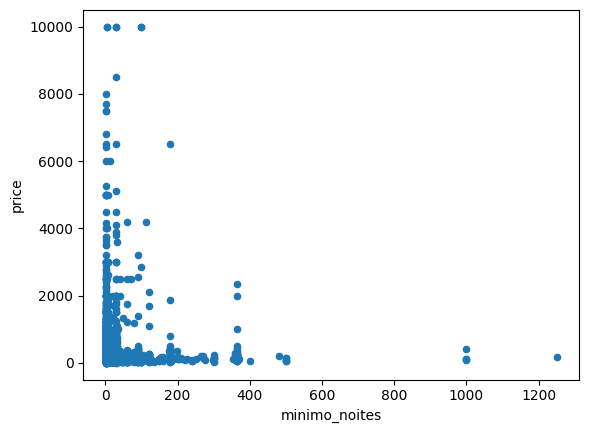

In [14]:
df.plot(x="minimo_noites", y="price", kind="scatter")

The scatter plot shows the same conclusion.

- Now we'll look at the availability in a year

In [21]:
df.sort_values("disponibilidade_365", ascending=False)[["price", "disponibilidade_365"]].head(10)

,price,disponibilidade_365
48886,170,365
1,150,365
48867,25,365
14893,86,365
4829,175,365
4814,500,365
4817,750,365
42598,443,365
20965,65,365
20838,100,365


In [19]:
df.sort_values("disponibilidade_365", ascending=True)[["price", "disponibilidade_365"]].head(10)

,price,disponibilidade_365
3,80,0
47571,100,0
47613,295,0
18197,103,0
47697,60,0
18195,159,0
18217,200,0
18214,325,0
47913,75,0
18208,130,0


<Axes: xlabel='disponibilidade_365', ylabel='price'>

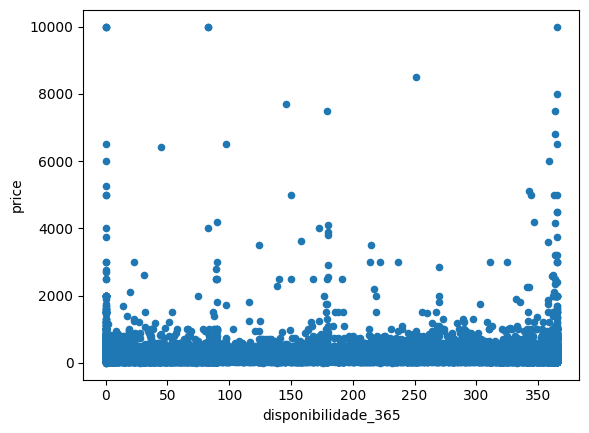

In [16]:
df.plot(x="disponibilidade_365", y="price", kind="scatter")

- The analysis of the data and the scatter plot show that are no strong correlations between availability and price.

#### 3 - Is there a pattern to the name of expensive places?

In [18]:
df.sort_values("price", ascending=False)[["nome", "price"]].head(10)

,nome,price
17691,Luxury 1 bedroom apt. -stunning Manhattan views,10000
29237,1-BR Lincoln Center,10000
9150,Furnished room in Astoria apartment,10000
6529,Spanish Harlem Apt,9999
40432,2br - The Heart of NYC: Manhattans Lower East ...,9999
12341,"Quiet, Clean, Lit @ LES & Chinatown",9999
30267,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,8500
4376,Film Location,8000
29661,East 72nd Townhouse by (Hidden by Airbnb),7703
42522,70' Luxury MotorYacht on the Hudson,7500


- The name of expensive places tend to be more professional, very objective but still descriptive and attractive.

## Checking for null values

In [469]:
df_null_count = df.isna().sum().sort_values(ascending=False)
df_null_count

ultima_review                    10052
reviews_por_mes                  10052
host_name                           21
nome                                16
bairro_group                         0
bairro                               0
id                                   0
host_id                              0
longitude                            0
latitude                             0
room_type                            0
price                                0
numero_de_reviews                    0
minimo_noites                        0
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

- Total: 48_894
- ultima_review -> 10_052 null
- review_por_mes -> 10_052 null
- host_name -> 21 null
- nome -> 16 null


### Null percentage

In [470]:
df_null_percentage = (df_null_count / 48_894) * 100
df_null_percentage

ultima_review                    20.558760
reviews_por_mes                  20.558760
host_name                         0.042950
nome                              0.032724
bairro_group                      0.000000
bairro                            0.000000
id                                0.000000
host_id                           0.000000
longitude                         0.000000
latitude                          0.000000
room_type                         0.000000
price                             0.000000
numero_de_reviews                 0.000000
minimo_noites                     0.000000
calculado_host_listings_count     0.000000
disponibilidade_365               0.000000
dtype: float64

- ultima_review -> 20%, very high percentage, but not too useful for analysis, so it's getting dropped
- review_por_mes -> 20%, very high percentage, might need imputing
- host_name -> 0,04%
- nome -> 0,03%

### Dropping ultima_review, because it has so many null values

In [471]:
df.drop("ultima_review", axis=1, inplace=True)

### Null rows

In [472]:
df_null_rows = df.isna().any(axis=1)
df[df_null_rows]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
18,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,2,249
25,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,1,0
35,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,1,365
37,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


Looking at this slice of the data, it's clear that the null values in reviews_por_mes are likely due to the lack of reviews for those places.
Because the regression model can use only numbers, the Not a number (NaN) values will need to be replaced.

In [473]:
no_reviews_df = df.query("numero_de_reviews == 0 and reviews_por_mes.isna()")
no_reviews = no_reviews_df.index
no_reviews_df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
18,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,2,249
25,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,1,0
35,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,1,365
37,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,1,365


In [474]:
df.loc[no_reviews, 'reviews_por_mes'] = df.loc[no_reviews, 'reviews_por_mes'].fillna(0)
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


In [475]:
df.isna().sum().sort_values(ascending=False)

host_name                        21
nome                             16
id                                0
host_id                           0
bairro_group                      0
bairro                            0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimo_noites                     0
numero_de_reviews                 0
reviews_por_mes                   0
calculado_host_listings_count     0
disponibilidade_365               0
dtype: int64

Since it's not possible to guess what's the name of the building nor its owner's, it's better to drop those rows

In [476]:
df.dropna(subset=["nome", "host_name"], inplace=True)

# Transformations

## Scaling

In [477]:
from sklearn.preprocessing import StandardScaler

### Columns to be scaled

- price
- minimo_noites
- numero_de_reviews
- reviews_por_mes
- disponibilidade_365

In [480]:
scaler = StandardScaler()
scaler_columns = ["latitude", "longitude", "minimo_noites", "numero_de_reviews", "reviews_por_mes",
                  "disponibilidade_365"]
df[scaler_columns] = scaler.fit_transform(df[scaler_columns])

price_scaler = StandardScaler()
df["price"] = price_scaler.fit_transform(df[["price"]])

df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,0.452572,-0.684589,Entire home/apt,0.300790,-0.300332,0.487692,-0.445225,2,1.840370
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,1.468593,0.222488,Private room,-0.011407,-0.200431,-0.522412,-0.683132,1,1.916354
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,-0.803332,-0.164433,Entire home/apt,-0.265328,-0.300332,5.538214,2.221835,1,0.617021
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,1.275842,0.177210,Entire home/apt,-0.302792,0.149224,-0.320391,-0.620525,1,-0.857075
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,0.343451,-0.494594,Entire home/apt,0.196725,-0.200431,1.138648,-0.313750,1,0.123123


## Encoding

In [411]:
from sklearn.preprocessing import LabelEncoder

## Columns that need to be encoded

- bairro_group
- bairro
- room_type

### bairro_group

In [412]:
bairro_group_encoder = LabelEncoder()
bairro_group_encoder.fit(df.bairro_group)
df['bairro_group'] = bairro_group_encoder.transform(df['bairro_group'])

bairro_group_map = {bg_enc: bg for bg_enc, bg in zip(bairro_group_encoder.classes_, df['bairro_group'].unique())}

# print(bairro_group_map)

df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,2,Midtown,0.452572,-0.684589,Entire home/apt,0.300790,-0.300332,0.487692,-0.445225,2,1.840370
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,Harlem,1.468593,0.222488,Private room,-0.011407,-0.200431,-0.522412,-0.683132,1,1.916354
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,Clinton Hill,-0.803332,-0.164433,Entire home/apt,-0.265328,-0.300332,5.538214,2.221835,1,0.617021
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,East Harlem,1.275842,0.177210,Entire home/apt,-0.302792,0.149224,-0.320391,-0.620525,1,-0.857075
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,2,Murray Hill,0.343451,-0.494594,Entire home/apt,0.196725,-0.200431,1.138648,-0.313750,1,0.123123


{'Bronx': 2, 'Brooklyn': 1, 'Manhattan': 3, 'Queens': 4, 'Staten Island': 0}

### bairro

In [413]:
bairro_encoder = LabelEncoder()
bairro_encoder.fit(df.bairro)
df['bairro'] = bairro_encoder.transform(df['bairro'])

bairro_map = {b_enc: b for b_enc, b in zip(bairro_encoder.classes_, df['bairro'].unique())}

# print(bairro_map)

df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,2,127,0.452572,-0.684589,Entire home/apt,0.300790,-0.300332,0.487692,-0.445225,2,1.840370
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,94,1.468593,0.222488,Private room,-0.011407,-0.200431,-0.522412,-0.683132,1,1.916354
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,41,-0.803332,-0.164433,Entire home/apt,-0.265328,-0.300332,5.538214,2.221835,1,0.617021
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,61,1.275842,0.177210,Entire home/apt,-0.302792,0.149224,-0.320391,-0.620525,1,-0.857075
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,2,137,0.343451,-0.494594,Entire home/apt,0.196725,-0.200431,1.138648,-0.313750,1,0.123123


{'Allerton': 12), 'Arden Heights': 94, 'Arrochar': 41, 'Arverne': 61, 'Astoria': 13), 'Bath Beach': 13, 'Battery Park City': 95, 'Bay Ridge': 20), 'Bay Terrace': 35, 'Bay Terrace, Staten Island': 18), 'Baychester': 20), 'Bayside': 21), 'Bayswater': 80, 'Bedford-Stuyvesant': 34, 'Belle Harbor': 51, 'Bellerose': 15), 'Belmont': 21), 'Bensonhurst': 10), 'Bergen Beach': 64, 'Boerum Hill': 91, 'Borough Park': 28, 'Breezy Point': 74, 'Briarwood': 11), 'Brighton Beach': 15), 'Bronxdale': 11), 'Brooklyn Heights': 11), 'Brownsville': 17), "Bull's Head": 20), 'Bushwick': 15), 'Cambria Heights': 20), 'Canarsie': 22), 'Carroll Gardens': 25, 'Castle Hill': 31, 'Castleton Corners': 85, 'Chelsea': 76, 'Chinatown': 43, 'City Island': 77, 'Civic Center': 19, 'Claremont Village': 18), 'Clason Point': 53, 'Clifton': 18), 'Clinton Hill': 96, 'Co-op City': 73, 'Cobble Hill': 16), 'College Point': 13), 'Columbia St': 10), 'Concord': 12), 'Concourse': 14), 'Concourse Village': 54, 'Coney Island': 75, 'Corona': 16), 'Crown Heights': 92, 'Cypress Hills': 11), 'DUMBO': 60, 'Ditmars Steinway': 19), 'Dongan Hills': 4) 'Douglaston': 10), 'Downtown Brooklyn': 39, 'Dyker Heights': 65, 'East Elmhurst': 11), 'East Flatbush': 19), 'East Harlem': 16), 'East Morrisania': 79, 'East New York': 14), 'East Village': 21), 'Eastchester': 20), 'Edenwald': 89, 'Edgemere': 86, 'Elmhurst': 0) 'Eltingville': 63, 'Emerson Hill': 19), 'Far Rockaway': 48, 'Fieldston': 17), 'Financial District': 70, 'Flatbush': 81, 'Flatiron District': 17, 'Flatlands': 19), 'Flushing': 17), 'Fordham': 19), 'Forest Hills': 47, 'Fort Greene': 68, 'Fort Hamilton': 23, 'Fort Wadsworth': 10), 'Fresh Meadows': 52, 'Glendale': 18), 'Gowanus': 2) 'Gramercy': 16), 'Graniteville': 20), 'Grant City': 40, 'Gravesend': 7) 'Great Kills': 87, 'Greenpoint': 18), 'Greenwich Village': 18), 'Grymes Hill': 22, 'Harlem': 15), "Hell's Kitchen": 45, 'Highbridge': 20), 'Hollis': 13), 'Holliswood': 11), 'Howard Beach': 30, 'Howland Hook': 6) 'Huguenot': 37, 'Hunts Point': 59, 'Inwood': 14), 'Jackson Heights': 13), 'Jamaica': 3) 'Jamaica Estates': 29, 'Jamaica Hills': 19), 'Kensington': 12), 'Kew Gardens': 46, 'Kew Gardens Hills': 20, 'Kingsbridge': 11, 'Kips Bay': 57, 'Laurelton': 15), 'Lighthouse Hill': 72, 'Little Italy': 10), 'Little Neck': 12), 'Long Island City': 44, 'Longwood': 13), 'Lower East Side': 36, 'Manhattan Beach': 84, 'Marble Hill': 15), 'Mariners Harbor': 16), 'Maspeth': 16), 'Melrose': 16), 'Middle Village': 15, 'Midland Beach': 12), 'Midtown': 21), 'Midwood': 17), 'Mill Basin': 21), 'Morningside Heights': 21), 'Morris Heights': 42, 'Morris Park': 18), 'Morrisania': 15), 'Mott Haven': 14), 'Mount Eden': 58, 'Mount Hope': 24, 'Murray Hill': 17), 'Navy Yard': 16), 'Neponsit': 11), 'New Brighton': 8) 'New Dorp': 14), 'New Dorp Beach': 38, 'New Springville': 21), 'NoHo': 78, 'Nolita': 12, 'North Riverdale': 13), 'Norwood': 26, 'Oakwood': 69, 'Olinville': 83, 'Ozone Park': 13), 'Park Slope': 11), 'Parkchester': 18), 'Pelham Bay': 99, 'Pelham Gardens': 14, 'Port Morris': 10), 'Port Richmond': 20), "Prince's Bay": 13), 'Prospect Heights': 20), 'Prospect-Lefferts Gardens': 71, 'Queens Village': 18), 'Randall Manor': 19), 'Red Hook': 50, 'Rego Park': 90, 'Richmond Hill': 12), 'Richmondtown': 12), 'Ridgewood': 55, 'Riverdale': 33, 'Rockaway Beach': 62, 'Roosevelt Island': 10), 'Rosebank': 13), 'Rosedale': 15), 'Rossville': 16), 'Schuylerville': 19), 'Sea Gate': 19), 'Sheepshead Bay': 20), 'Shore Acres': 17), 'Silver Lake': 13), 'SoHo': 11), 'Soundview': 93, 'South Beach': 98, 'South Ozone Park': 15), 'South Slope': 16, 'Springfield Gardens': 17), 'Spuyten Duyvil': 67, 'St. Albans': 14), 'St. George': 12), 'Stapleton': 10, 'Stuyvesant Town': 12), 'Sunnyside': 18, 'Sunset Park': 16), 'Theater District': 10), 'Throgs Neck': 17), 'Todt Hill': 49, 'Tompkinsville': 14), 'Tottenville': 15), 'Tremont': 18), 'Tribeca': 5) 'Two Bridges': 10), 'Unionport': 14), 'University Heights': 32, 'Upper East Side': 97, 'Upper West Side': 56, 'Van Nest': 10), 'Vinegar Hill': 14), 'Wakefield': 66, 'Washington Heights': 88, 'West Brighton': 21), 'West Farms': 9) 'West Village': 21), 'Westchester Square': 11), 'Westerleigh': 82, 'Whitestone': 17), 'Williamsbridge': 19), 'Williamsburg': 12), 'Willowbrook': 1) 'Windsor Terrace': 27, 'Woodhaven': 14), 'Woodlawn': 17), 'Woodrow': 21, 'Woodside': 21)}

### room_type

In [414]:
room_type_encoder = LabelEncoder()
room_type_encoder.fit(df.room_type)
df['room_type'] = room_type_encoder.transform(df['room_type'])

room_type_map = {r_enc: r for r_enc, r in zip(room_type_encoder.classes_, df['room_type'].unique())}

print(room_type_map)

df.head()

{'Entire home/apt': np.int64(0), 'Private room': np.int64(1), 'Shared room': np.int64(2)}


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,2,127,0.452572,-0.684589,0,0.300790,-0.300332,0.487692,-0.445225,2,1.840370
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,94,1.468593,0.222488,1,-0.011407,-0.200431,-0.522412,-0.683132,1,1.916354
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,41,-0.803332,-0.164433,0,-0.265328,-0.300332,5.538214,2.221835,1,0.617021
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,61,1.275842,0.177210,0,-0.302792,0.149224,-0.320391,-0.620525,1,-0.857075
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,2,137,0.343451,-0.494594,0,0.196725,-0.200431,1.138648,-0.313750,1,0.123123


In [415]:
df.describe()

,id,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.885700e+04,4.885700e+04,48857.000000,48857.000000,4.885700e+04,4.885700e+04,48857.000000,4.885700e+04,4.885700e+04,4.885700e+04,4.885700e+04,48857.000000,4.885700e+04
mean,1.902374e+07,6.763307e+07,1.675461,107.130892,2.291445e-15,-1.354820e-13,0.503981,-1.861544e-17,-1.512505e-17,6.515405e-17,5.584633e-17,7.148392,-4.653861e-17
std,1.098267e+07,7.862410e+07,0.735847,68.747572,1.000010e+00,1.000010e+00,0.545376,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,32.964937,1.000010e+00
min,2.595000e+03,2.438000e+03,0.000000,0.000000,-4.202599e+00,-6.331338e+00,0.000000,-6.358026e-01,-3.003320e-01,-5.224123e-01,-6.831316e-01,1.000000,-8.570753e-01
25%,9.476198e+06,7.821383e+06,1.000000,51.000000,-7.125502e-01,-6.694237e-01,0.000000,-3.485808e-01,-3.003320e-01,-4.999655e-01,-6.580888e-01,1.000000,-8.570753e-01
50%,1.969118e+07,3.079133e+07,2.000000,94.000000,-1.077063e-01,-7.604375e-02,0.000000,-1.945632e-01,-2.004306e-01,-4.101785e-01,-4.514856e-01,1.000000,-5.151456e-01
75%,2.915779e+07,1.074344e+08,2.000000,178.000000,6.266161e-01,3.442399e-01,1.000000,9.265868e-02,-1.005291e-01,1.631005e-02,3.060596e-01,2.000000,8.677699e-01
max,3.648724e+07,2.743213e+08,4.000000,220.000000,3.376657e+00,5.181619e+00,2.000000,4.099056e+01,6.208809e+01,1.359660e+01,3.594198e+01,327.000000,1.916354e+00


## Removing non-numerical columns

In [416]:
df.drop(["id", "host_id", "nome", "host_name"], axis=1, inplace=True)
df.head()

,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2,127,0.452572,-0.684589,0,0.300790,-0.300332,0.487692,-0.445225,2,1.840370
1,2,94,1.468593,0.222488,1,-0.011407,-0.200431,-0.522412,-0.683132,1,1.916354
2,1,41,-0.803332,-0.164433,0,-0.265328,-0.300332,5.538214,2.221835,1,0.617021
3,2,61,1.275842,0.177210,0,-0.302792,0.149224,-0.320391,-0.620525,1,-0.857075
4,2,137,0.343451,-0.494594,0,0.196725,-0.200431,1.138648,-0.313750,1,0.123123


## Plotting correlations

In [417]:
import plotly.express as px

px.imshow(df.corr(), text_auto=True)

# Modeling

- After transforming every non-numerical column needed to make the model, bairro_group and bairro, it's time to train a model, this a regression problem since we want to predict a continuous value, the price, the correlation showed that there are no variables with huge correlation with the price, but they still have a correlation, the most important variables are going to room_type, location variables (bairro_group, bairro, latitude, longitude) and review variables (numero_de_reviews, reviews_por_mes). The performance metric chosen is root mean squared error (RMSE), RMSE shows the square root of the average squared differences between the predicted and actual values, so it's a great metric to evaluate regression models.

In [418]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

## Separate features and target

In [419]:
X = df.drop("price", axis=1)
y = df["price"]

## Training models

### Create GridSearchCV to compare models

In [420]:
pipe = Pipeline(
    [
        ('regressor', DummyRegressor())
    ]
)

param_grid = [
    {
        'regressor': [DummyRegressor()]
    },
    {
        'regressor': [LinearRegression()]
    },
    {
        'regressor': [AdaBoostRegressor(n_estimators=100, random_state=42)]
    },
    {
        'regressor': [RandomForestRegressor(n_estimators=100, criterion="squared_error", max_depth=10, random_state=42)]
    },
    {
        'regressor': [GradientBoostingRegressor(n_estimators=100, random_state=42)]
    },
    # {
    #     'regressor': [XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)],
    # }

]

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=3,
                           return_train_score=True)

### Fit GridSearchCV

In [421]:
grid_search.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('regressor', DummyRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [DummyRegressor()]},
                         {'regressor': [LinearRegression()]},
                         {'regressor': [AdaBoostRegressor(n_estimators=100,
                                                          random_state=42)]},
                         {'regressor': [RandomForestRegressor(max_depth=10,
                                                              random_state=42)]},
                         {'regressor': [GradientBoostingRegressor(random_state=42)]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [422]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,4.710417,0.027128,0.011426,0.000858,GradientBoostingRegressor(random_state=42),{'regressor': GradientBoostingRegressor(random...,-1.078865,-0.832093,-0.850210,-0.876089,...,-0.940259,0.108129,1,-0.814486,-0.865746,-0.867067,-0.856216,-0.827589,-0.846221,0.021307
1,0.015475,0.000510,0.002005,0.000550,LinearRegression(),{'regressor': LinearRegression()},-1.100303,-0.840641,-0.836793,-0.904549,...,-0.948796,0.111266,2,-0.913919,-0.980385,-0.981104,-0.966005,-0.925452,-0.953373,0.028265
3,9.084797,0.048504,0.056276,0.001321,"RandomForestRegressor(max_depth=10, random_sta...",{'regressor': RandomForestRegressor(max_depth=...,-1.084918,-0.839446,-0.833459,-0.907745,...,-0.958673,0.124119,3,-0.582102,-0.608362,-0.624024,-0.613282,-0.570694,-0.599693,0.020011
0,0.010821,0.006552,0.001204,0.000679,DummyRegressor(),{'regressor': DummyRegressor()},-1.132134,-0.878982,-0.882113,-0.956526,...,-0.994346,0.111902,4,-0.964206,-1.028078,-1.027492,-1.010584,-0.967289,-0.999530,0.028307
2,0.975158,0.203221,0.014971,0.004412,"AdaBoostRegressor(n_estimators=100, random_sta...",{'regressor': AdaBoostRegressor(n_estimators=1...,-2.425880,-2.118396,-1.210321,-1.613586,...,-1.926625,0.449794,5,-2.273393,-1.979791,-1.310906,-1.988549,-2.012640,-1.913056,0.320155


In [423]:
grid_search.best_params_

{'regressor': GradientBoostingRegressor(random_state=42)}

### HyperTuning a GradientBoostingRegressor model

In [424]:
params = {
    'learning_rate': [0.01, 0.02, 0.03],
    'n_estimators': [50, 100],
    'min_samples_leaf': [2, 4],
    'max_depth': [3, 5],
    'n_iter_no_change': [10, 20]

}

gscv_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42), params, scoring="neg_root_mean_squared_error",
                        n_jobs=1, verbose=3, return_train_score=True)

In [425]:
gscv_gbr.fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, n_estimators=50, n_iter_no_change=10;, score=(train=-0.924, test=-1.107) total time=   1.7s
[CV 2/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, n_estimators=50, n_iter_no_change=10;, score=(train=-0.985, test=-0.848) total time=   1.7s
[CV 3/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, n_estimators=50, n_iter_no_change=10;, score=(train=-0.983, test=-0.852) total time=   1.7s
[CV 4/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, n_estimators=50, n_iter_no_change=10;, score=(train=-0.968, test=-0.926) total time=   1.7s
[CV 5/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, n_estimators=50, n_iter_no_change=10;, score=(train=-0.929, test=-1.085) total time=   1.7s
[CV 1/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, n_estimators=50, n_iter_no_change=20;, score=(train=-0.924, test=-1.107) total tim

GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [3, 5], 'min_samples_leaf': [2, 4],
                         'n_estimators': [50, 100],
                         'n_iter_no_change': [10, 20]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [426]:
pd.DataFrame(gscv_gbr.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_n_estimators,param_n_iter_no_change,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
46,5.901277,0.035600,0.018157,0.000448,0.03,5,4,100,10,"{'learning_rate': 0.03, 'max_depth': 5, 'min_s...",...,-0.923255,0.108485,1,-0.816499,-0.872601,-0.857614,-0.848614,-0.812106,-0.841487,0.023523
47,5.899427,0.032219,0.018831,0.000506,0.03,5,4,100,20,"{'learning_rate': 0.03, 'max_depth': 5, 'min_s...",...,-0.923255,0.108485,1,-0.816499,-0.872601,-0.857614,-0.848614,-0.812106,-0.841487,0.023523
43,5.893470,0.036803,0.018622,0.000453,0.03,5,2,100,20,"{'learning_rate': 0.03, 'max_depth': 5, 'min_s...",...,-0.924162,0.120134,3,-0.800362,-0.857035,-0.832888,-0.819490,-0.781885,-0.818332,0.025932
42,5.908037,0.042963,0.018322,0.000241,0.03,5,2,100,10,"{'learning_rate': 0.03, 'max_depth': 5, 'min_s...",...,-0.924162,0.120134,3,-0.800362,-0.857035,-0.832888,-0.819490,-0.781885,-0.818332,0.025932
27,5.922877,0.039001,0.019241,0.000639,0.02,5,2,100,20,"{'learning_rate': 0.02, 'max_depth': 5, 'min_s...",...,-0.927233,0.114006,5,-0.829099,-0.884464,-0.858141,-0.844460,-0.807089,-0.844651,0.026153
26,5.917636,0.032474,0.019433,0.000431,0.02,5,2,100,10,"{'learning_rate': 0.02, 'max_depth': 5, 'min_s...",...,-0.927233,0.114006,5,-0.829099,-0.884464,-0.858141,-0.844460,-0.807089,-0.844651,0.026153
30,5.924879,0.031368,0.019080,0.000702,0.02,5,4,100,10,"{'learning_rate': 0.02, 'max_depth': 5, 'min_s...",...,-0.927269,0.106686,7,-0.841233,-0.898180,-0.881064,-0.872331,-0.832278,-0.865017,0.024691
31,5.919047,0.038110,0.019566,0.000907,0.02,5,4,100,20,"{'learning_rate': 0.02, 'max_depth': 5, 'min_s...",...,-0.927269,0.106686,7,-0.841233,-0.898180,-0.881064,-0.872331,-0.832278,-0.865017,0.024691
45,2.959126,0.020532,0.010735,0.000275,0.03,5,4,50,20,"{'learning_rate': 0.03, 'max_depth': 5, 'min_s...",...,-0.932463,0.108125,9,-0.855657,-0.913412,-0.899787,-0.887790,-0.853343,-0.881998,0.023882
44,2.963640,0.021538,0.010611,0.000585,0.03,5,4,50,10,"{'learning_rate': 0.03, 'max_depth': 5, 'min_s...",...,-0.932463,0.108125,9,-0.855657,-0.913412,-0.899787,-0.887790,-0.853343,-0.881998,0.023882


In [427]:
gscv_gbr.best_params_

{'learning_rate': 0.03,
 'max_depth': 5,
 'min_samples_leaf': 4,
 'n_estimators': 100,
 'n_iter_no_change': 10}

In [428]:
params = {
    'learning_rate': [0.03, 0.04],
          'max_depth': [3, 5],
          'min_samples_leaf': [2],
          'n_estimators': [100],
          'n_iter_no_change': [10]
}

gscv_gbr_best_params = GridSearchCV(GradientBoostingRegressor(random_state=42), params, scoring="neg_root_mean_squared_error", n_jobs=1, verbose=3, return_train_score=True)

In [429]:
gscv_gbr_best_params.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END learning_rate=0.03, max_depth=3, min_samples_leaf=2, n_estimators=100, n_iter_no_change=10;, score=(train=-0.878, test=-1.087) total time=   3.5s
[CV 2/5] END learning_rate=0.03, max_depth=3, min_samples_leaf=2, n_estimators=100, n_iter_no_change=10;, score=(train=-0.938, test=-0.823) total time=   3.5s
[CV 3/5] END learning_rate=0.03, max_depth=3, min_samples_leaf=2, n_estimators=100, n_iter_no_change=10;, score=(train=-0.927, test=-0.827) total time=   3.5s
[CV 4/5] END learning_rate=0.03, max_depth=3, min_samples_leaf=2, n_estimators=100, n_iter_no_change=10;, score=(train=-0.916, test=-0.891) total time=   3.5s
[CV 5/5] END learning_rate=0.03, max_depth=3, min_samples_leaf=2, n_estimators=100, n_iter_no_change=10;, score=(train=-0.883, test=-1.041) total time=   3.5s
[CV 1/5] END learning_rate=0.03, max_depth=5, min_samples_leaf=2, n_estimators=100, n_iter_no_change=10;, score=(train=-0.800, test=-1.095) total

GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), n_jobs=1,
             param_grid={'learning_rate': [0.03, 0.04], 'max_depth': [3, 5],
                         'min_samples_leaf': [2], 'n_estimators': [100],
                         'n_iter_no_change': [10]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [430]:
pd.DataFrame(gscv_gbr_best_params.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_n_estimators,param_n_iter_no_change,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,5.909151,0.039514,0.017631,0.000198,0.04,5,2,100,10,"{'learning_rate': 0.04, 'max_depth': 5, 'min_s...",...,-0.921069,0.119971,1,-0.778122,-0.837538,-0.813220,-0.805618,-0.767047,-0.800309,0.025217
1,5.919861,0.037465,0.018400,0.000581,0.03,5,2,100,10,"{'learning_rate': 0.03, 'max_depth': 5, 'min_s...",...,-0.924162,0.120134,2,-0.800362,-0.857035,-0.832888,-0.819490,-0.781885,-0.818332,0.025932
2,3.586916,0.029207,0.011793,0.000524,0.04,3,2,100,10,"{'learning_rate': 0.04, 'max_depth': 3, 'min_s...",...,-0.930372,0.109383,3,-0.866716,-0.927700,-0.918582,-0.906855,-0.874433,-0.898857,0.024143
0,3.588145,0.014900,0.012716,0.000248,0.03,3,2,100,10,"{'learning_rate': 0.03, 'max_depth': 3, 'min_s...",...,-0.933662,0.109947,4,-0.877946,-0.937929,-0.927314,-0.916321,-0.882841,-0.908470,0.023971


### Feature importance

In [501]:
pd.Series(gscv_gbr_best_params.best_estimator_.feature_importances_, X.columns).sort_values(ascending=False)

longitude                        0.176673
room_type                        0.169504
minimo_noites                    0.138750
disponibilidade_365              0.123124
bairro                           0.120070
calculado_host_listings_count    0.111779
latitude                         0.098200
numero_de_reviews                0.032858
reviews_por_mes                  0.026960
bairro_group                     0.002083
dtype: float64

### Saving the model

In [ ]:
import pickle

with open("gscv_gbr_best_params.pkl", "wb") as f:
    pickle.dump(gscv_gbr_best_params.best_estimator_, f)

# Predictions

In [484]:
X_pred = pd.DataFrame([{
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355}])

In [485]:
if "id" in X_pred.columns:
    X_pred.drop(["id", "nome", "host_id", "host_name", "ultima_review"], axis=1, inplace=True)

if "price" in scaler_columns:
    scaler_columns.remove("price")

X_pred[scaler_columns] = scaler.transform(X_pred[scaler_columns])
X_pred["bairro_group"] = X_pred["bairro_group"].map(bairro_group_map)
X_pred["bairro"] = X_pred["bairro"].map(bairro_map)
X_pred["room_type"] = X_pred["room_type"].map(room_type_map)
X_pred

,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,3,213,40.75362,-73.98377,0,1.0,45.0,0.38,2,355.0


In [488]:
y_pred = gscv_gbr_best_params.best_estimator_.predict(X_pred)
y_pred

array([3.86336967])

In [496]:
y_pred_unscaled = price_scaler.inverse_transform(y_pred.reshape(1, -1))
print(f"The rent value for this building is predicted as {y_pred_unscaled[0][0].round(2)}")

The rent value for this building is predicted as 1080.85
